# Project: Investigate the Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


Personally i chose the movies dataset  to analayis. 
This dataset talks about each detail in movies like name , cast , director ,budget , revenue and release year that help us to answer some questions which are: <br>

Q1 : What genres is used the most

Q2 : which director made more movies

Q3 : Is the most voted movie of that director is the highest at all

Q4 : what is the most year in releasing movies

Q5 : Is the most year in realeasing movies has the most revenu movie?

Q6 : Is there a relation between the budget used in the movie and the votes?

Q7 : Is there a relation between the budget used in the movie and the Revenue?

In [3]:
#importing some packages that we will use
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out the DeprecationWarning
warnings.filterwarnings("ignore", message="Pyarrow will become a required dependency of pandas in the next major release")

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#loading the dataset
df = pd.read_csv("tmdb-movies.csv")

#print the first 5 rows from the dataset to see what does it have
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning 

In [3]:
#Dropping(ie: deleting) useless column that we will not use and take much space with out benefit
df.drop(["id", "imdb_id" , "cast", "homepage", "tagline", "overview","keywords"], axis = 1, inplace = True)

In [4]:
#printing the top 5 rows of the data set after deleting the usless columns to make sure everything is correct
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#Checking how many rows and columns do we have after droping useless columns
#Note the first number is the rows and the secound number is the coulmns
df.shape

(10866, 14)

In [6]:
#checking details about the DataFrame's columns like number of non-null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


<font size="4">Problems need to be fixed</font>
<u>
    <li> Handling the Nan values in both genres and production_compaines columns either by filling or deleting them </li>
    <li> Fixing the relase_date column data type which should not be object


</u>

<font size="4">Problem No.1</font>

In [7]:
#Checking the number of the NaN values in production_companies column
df["production_companies"].isnull().sum()

1030


As we can see there are tons of NaN values in the production_compines columns.
we cannot fill these NaN values with any method because every movie has its own production_compainy/ies so we cannot fill these NaN values with methods like mode because we do not know if the most common production_company/ies really produced that movie or not (we cannot use median or mean these require numerical values!)

Therefore the best way to handle these NaN values is to drop the entire column
Also droping the entire row instead of column is not prefered as we will lose so much data

In [8]:
#dropping production_compaines column
df.drop("production_companies", axis = 1 , inplace = True)

In [9]:
#checking if we dropped it correctly 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   director        10822 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
 11  budget_adj      10866 non-null  float64
 12  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


as we can see it no longer exists

In [10]:
#Checking the number of NaN values in the  genres column
df["genres"].isnull().sum()

23

Now we have another little Nan values in the genres column
same as before we cannot fill these NaN values with methonds like mode because every movie has its own genre

so we  will drop them again 
but in this case we will drop the row instead of the column as the number of rows that will be dropped is small relative to the entire dataset so it will not effect that much instead of losing an entire column

In [11]:
#we can use this method to drop all the NaN values in the set as the only NaN values left are those in genres column
df.dropna(inplace = True)

In [12]:
#checking if there are NaN values or not
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

As we can see here there are no more NaN values so we fixed the first problem

<font size="4">Problem No.2</font>

In [13]:
#checking the date type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10801 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10801 non-null  float64
 1   budget          10801 non-null  int64  
 2   revenue         10801 non-null  int64  
 3   original_title  10801 non-null  object 
 4   director        10801 non-null  object 
 5   runtime         10801 non-null  int64  
 6   genres          10801 non-null  object 
 7   release_date    10801 non-null  object 
 8   vote_count      10801 non-null  int64  
 9   vote_average    10801 non-null  float64
 10  release_year    10801 non-null  int64  
 11  budget_adj      10801 non-null  float64
 12  revenue_adj     10801 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


As we can see here the release_date column should be datetime64[ns] not object data type as it contains date. <br>
And the release_year coulmn should be datetime64[ns] not int64

**Note**:
<u>
    <li>Float is decimal</li>
    <li>int is integer</li>
    <li>object is string</li>
    <li>datetime is used for dates</li>
</u>

In [14]:
#changing the column data type into datetime64[ns]
df["release_date"] = pd.to_datetime(df["release_date"] , format='%m/%d/%y')
df["release_year"] = pd.to_datetime(df["release_year"] , format='%Y')

In [15]:
#checking the data type of the columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10801 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10801 non-null  float64       
 1   budget          10801 non-null  int64         
 2   revenue         10801 non-null  int64         
 3   original_title  10801 non-null  object        
 4   director        10801 non-null  object        
 5   runtime         10801 non-null  int64         
 6   genres          10801 non-null  object        
 7   release_date    10801 non-null  datetime64[ns]
 8   vote_count      10801 non-null  int64         
 9   vote_average    10801 non-null  float64       
 10  release_year    10801 non-null  datetime64[ns]
 11  budget_adj      10801 non-null  float64       
 12  revenue_adj     10801 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(4), object(3)
memory usage: 1.2+ MB


Now we have fixed the data type of the release_date and the release_year columns
we fixed the 2 problems

Last thing to do is to check if there are duplicates or not so our data is prefectly clean

In [16]:
#checking if there are duplicates it the dataset
df.duplicated().sum()

1

As we can see we have 1 duplicate

Se we will drop it

In [17]:
#dropping the duplicate
df.drop_duplicates(inplace = True)

In [18]:
#Check if it has been dropped 
df.duplicated().sum()

0

As we can see there are no more duplicates
And know our data set is perfectly clean

In [19]:
#last look on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10800 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10800 non-null  float64       
 1   budget          10800 non-null  int64         
 2   revenue         10800 non-null  int64         
 3   original_title  10800 non-null  object        
 4   director        10800 non-null  object        
 5   runtime         10800 non-null  int64         
 6   genres          10800 non-null  object        
 7   release_date    10800 non-null  datetime64[ns]
 8   vote_count      10800 non-null  int64         
 9   vote_average    10800 non-null  float64       
 10  release_year    10800 non-null  datetime64[ns]
 11  budget_adj      10800 non-null  float64       
 12  revenue_adj     10800 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(4), object(3)
memory usage: 1.2+ MB


In [20]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015-01-01,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015-01-01,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015-01-01,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015-01-01,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015-01-01,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Q1 : What genres is used the most

As it is written in udacity.com "Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters." we have a little problem here we need to split the values which are separeted by | before we start

In [21]:


# Function to split genres into a list of individual genres
def split_genres(genre_string):
    # Check if '|' exists in the string
    if '|' in genre_string:
        return genre_string.split('|')
    else:
        # If '|' doesn't exist, return a list with a single genre
        return [genre_string]

# Apply the function to create a new column with lists of individual genres
df['individual_genre'] = df['genres'].apply(split_genres)

# Explode the lists in the 'individual_genre' column to create new rows for each genre
df = df.explode('individual_genre')

# Reset index
df.reset_index(drop=True, inplace=True)



Here we separeted each genre on a row alone 
we need to check that

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26864 entries, 0 to 26863
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   popularity        26864 non-null  float64       
 1   budget            26864 non-null  int64         
 2   revenue           26864 non-null  int64         
 3   original_title    26864 non-null  object        
 4   director          26864 non-null  object        
 5   runtime           26864 non-null  int64         
 6   genres            26864 non-null  object        
 7   release_date      26864 non-null  datetime64[ns]
 8   vote_count        26864 non-null  int64         
 9   vote_average      26864 non-null  float64       
 10  release_year      26864 non-null  datetime64[ns]
 11  budget_adj        26864 non-null  float64       
 12  revenue_adj       26864 non-null  float64       
 13  individual_genre  26864 non-null  object        
dtypes: datetime64[ns](2), 

As we can see there is now a new column called "individual_genre" of type object which has each genre on a row alone

Now we want to plot the value counts of these genres to check which genre is the most popluar

C:\Users\mina nabil\AppData\Local\Temp\ipykernel_7616\4184472823.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


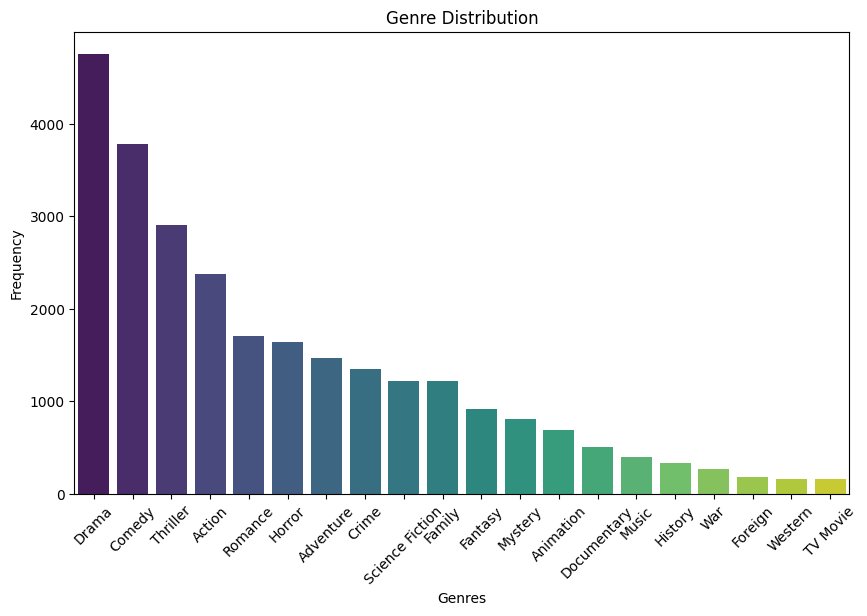

In [23]:
#Getting the value counts of the genres
genre_counts = df["individual_genre"].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Genre Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

As we can see most of the movies are Drama

### Q2 : which director made more movies

In [24]:
#code to counts the number of the movies directed by a single director
df.director.value_counts()

director
Woody Allen         105
Clint Eastwood       99
Steven Spielberg     80
Ridley Scott         72
Joel Schumacher      62
                   ... 
Alain Resnais         1
Gauri Shinde          1
Regan Hall            1
Boudewijn Koole       1
Harold P. Warren      1
Name: count, Length: 5056, dtype: int64

its clearly that Woody Allen directed the most number of the movies 

### Q3 : Is the most voted movie of that director is the highest at all

In [25]:
#Filter rows where the director is woody allen
woody = df["director"] == "Woody Allen"

#code to see the most voted movie that Woody Allen directed
df[woody]["vote_average"].max()

7.7

In [26]:
#code to see the most voted movie at general
df["vote_average"].max()

9.2

Here we can see that the most voted movie directed by Woody Allen has 7.7 average votes 
while the most voted movie at general has 9.2 average votes
So here since the one who directed the most voted movie is not the one who directed most of the movies (ie: Woody Allen) we can assume that this director is more experinced  and he is the most expensive thus he isnt the most director who directed movies

### Q4 : what is the most year in releasing movies

Here we will plot the value counts of realsing years to see the most year in realsing movies

C:\Users\mina nabil\AppData\Local\Temp\ipykernel_7616\1147907413.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=release_year_counts.index, y=release_year_counts.values, palette='viridis')


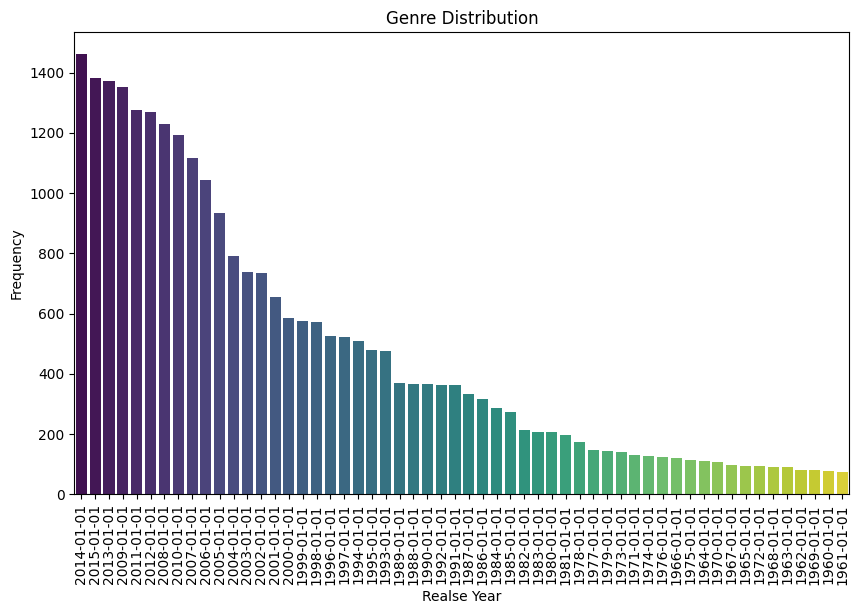

In [27]:
#Getting the value counts of the years
release_year_counts = df["release_year"].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=release_year_counts.index, y=release_year_counts.values, palette='viridis')
plt.xlabel('Realse Year')
plt.ylabel('Frequency')
plt.title('Genre Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

It's clear that the number of movies released in 2014 is more than any year

### Q5 : Is the most year in releasing movies has the most revenu movie?

In [28]:
df[df["revenue_adj"] == df["revenue_adj"].max()]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,individual_genre
2989,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009-01-01,2.408869e+08,2.827124e+09,Action
2990,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009-01-01,2.408869e+08,2.827124e+09,Adventure
2991,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009-01-01,2.408869e+08,2.827124e+09,Fantasy
2992,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009-01-01,2.408869e+08,2.827124e+09,Science Fiction


Here it says that the most revenued movie is not in 2014 (the most year of releasign movies) but it is 2009 espically december (there are many rows because the individual_genre we made)

The following code represents to us the average of the revenue in each month in 2014 (the most year in releasing movies)

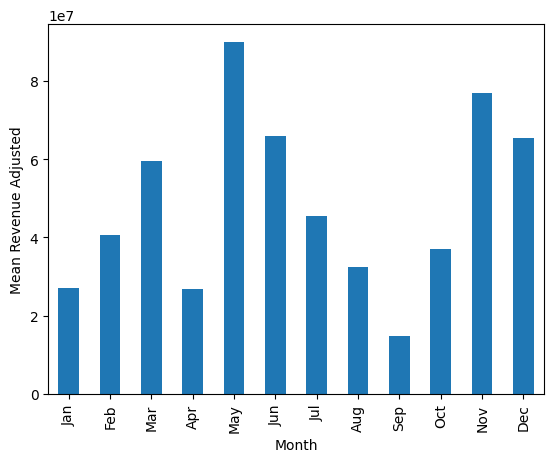

In [29]:

# Extract month from release_date
df['release_month'] = df['release_date'].dt.month

# Filter rows where release_year is 2014
filtered_df = df[df["release_year"] == "2014"]



# Group by release_month and calculate the mean revenue_adj
monthly_mean_revenue = filtered_df.groupby("release_month")["revenue_adj"].mean()

# Plotting the results
monthly_mean_revenue.plot(kind="bar")
plt.ylabel("Mean Revenue Adjusted")
plt.xlabel("Month")
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) #puting the names of the months on x-axis
plt.show()



From the bar plot we can notice that the most months in revenu in 2014 are both Nov and Dec which means movies in Nov and Dec were so sucessful but not quite in sep

### Q6 : Is there a relation between the budget used in the movie and the votes?

To answer this question we will make a scatter plot that shows the relation between the votes and the budget used

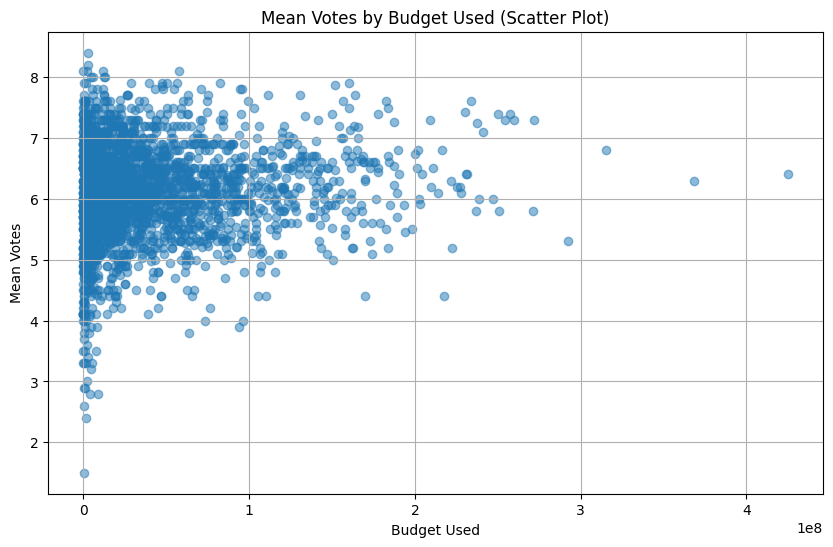

In [30]:
# Group by budget_adj and calculate the mean vote_count
mean_votes_by_budget = df.groupby("budget_adj")["vote_average"].mean()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(mean_votes_by_budget.index, mean_votes_by_budget.values, alpha=0.5)
plt.xlabel("Budget Used")
plt.ylabel("Mean Votes")
plt.title("Mean Votes by Budget Used (Scatter Plot)")
plt.grid()
plt.show()



Here we can see that there are some outliers in budget_adj that we need to remove to answer that question

In [31]:
# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, col_name):
    # Calculate the first quartile (Q1)
    q1 = df[col_name].quantile(0.25)
    
    # Calculate the third quartile (Q3)
    q3 = df[col_name].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Define the lower and upper fences for outlier detection
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    
    # Filter rows where the value is within the IQR range
    df_clean = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
    
    return df_clean

df = remove_outliers_iqr(df, 'budget_adj')

# Group by budget_adj and calculate the mean vote_average
mean_votes_by_budget = df.groupby("budget_adj")["vote_average"].mean()


Now we can see our plot

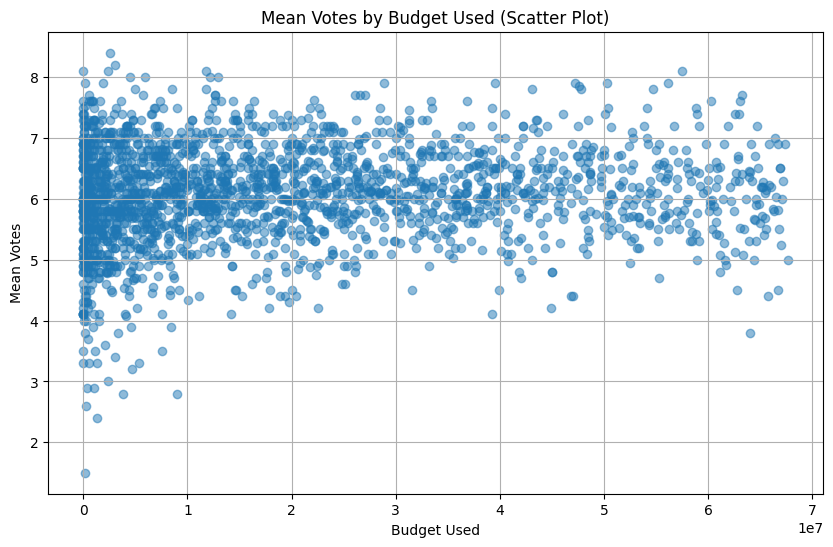

In [32]:

# Group by budget_adj and calculate the mean vote_average
mean_votes_by_budget = df.groupby("budget_adj")["vote_average"].mean()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(mean_votes_by_budget.index, mean_votes_by_budget.values, alpha=0.5)
plt.xlabel("Budget Used")
plt.ylabel("Mean Votes")
plt.title("Mean Votes by Budget Used (Scatter Plot)")
plt.grid(True)
plt.show()

The plot indicates that increased spending does not consistently correlate with higher mean votes.

### Q7 : Is there a relation between the budget used in the movie and the Revenue?

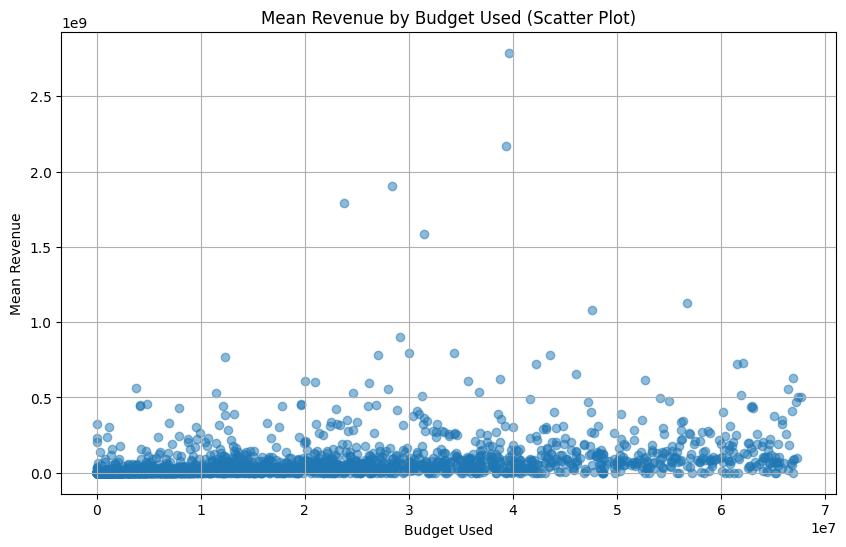

In [33]:
# Group by budget_adj and calculate the mean Revenue
mean_revenue_by_budget = df.groupby("budget_adj")["revenue_adj"].mean()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(mean_revenue_by_budget.index, mean_revenue_by_budget.values, alpha=0.5)
plt.xlabel("Budget Used")
plt.ylabel("Mean Revenue")
plt.title("Mean Revenue by Budget Used (Scatter Plot)")
plt.grid(True)
plt.show()

Here we can see that there are some outliers in revenue_adj that we need to remove to answer that question

In [34]:
df = remove_outliers_iqr(df, "revenue_adj")

Let us see our plot

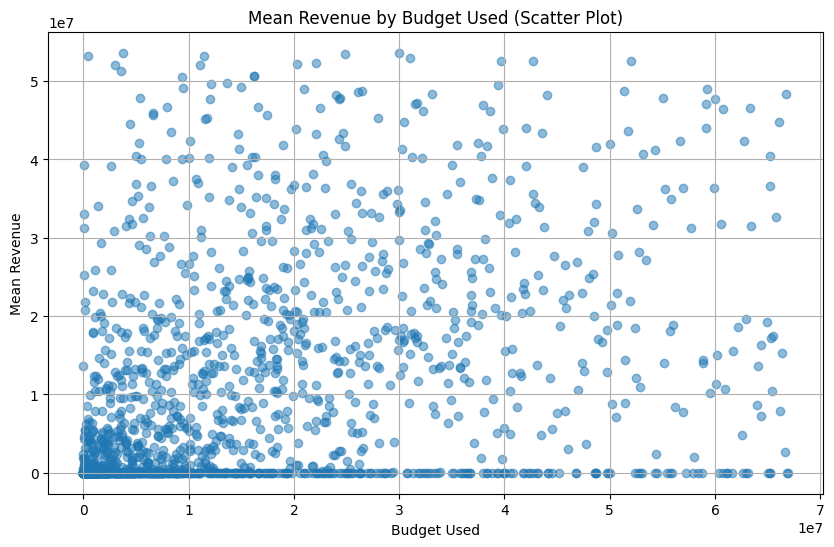

In [35]:
# Group by budget_adj and calculate the mean Revenue
mean_revenue_by_budget = df.groupby("budget_adj")["revenue_adj"].mean()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(mean_revenue_by_budget.index, mean_revenue_by_budget.values, alpha=0.5)
plt.xlabel("Budget Used")
plt.ylabel("Mean Revenue")
plt.title("Mean Revenue by Budget Used (Scatter Plot)")
plt.grid(True)
plt.show()

This plot also indicates that increased spending does not consistently correlate with higher mean revenue. so we can't say there is a relation

<a id='conclusions'></a>
## Conclusions



Here i will write a conclusion about all the answers that i got
after i cleaned the data it was the time to explore it and answer some questions and the questions were:


### Q1: What genres are used the most?
**Methodology:** First, I split the rows containing "|" to have each genre on a single row. Then, I plotted the value counts of genres to identify the most frequently used genre.<br>
**Findings:** The most frequently used genre in the dataset was "Drama".

### Q2: Which director made the most movies?
**Methodology:** I used the `value_counts` function to determine which director made the most movies.<br>
**Findings:** The director who made the most movies was Woody Allen.

### Q3: Is the highest-rated movie of that director the highest-rated overall?
**Methodology:** I compared the top-rated movie overall with the top-rated movie by Woody Allen to see if the director with the most movies had the highest-rated movie overall.<br>
**Findings:** The top-rated movie overall had an average rating of 9.2, while the top-rated movie by Woody Allen had an average rating of 7.7, suggesting that the director with the most movies may not necessarily have the highest-rated movie overall.

### Q4: What is the most common year for releasing movies?
**Methodology:** I plotted the value counts of movie release years to determine the most common year for movie releases.<br>
**Findings:** The most common year for releasing movies was 2014.

### Q5: Does the year with the most movie releases have the highest revenue?
**Methodology:** I investigated if the year with the most movie releases (2014) had the highest revenue.<br>
**Findings:** The year with the highest revenue was 2009, not 2014, suggesting that revenue does not necessarily depend on the number of movies released in a year.

### Q6: Is there a relationship between movie budget and votes?
**Methodology:** I created a scatter plot to explore the relationship between movie votes and budgets, removing outliers.<br>
**Findings:** There was no clear relationship between movie votes and budgets, indicating that success is not solely determined by the budget.

### Q7: Is there a relationship between movie budget and revenue?
**Methodology:** I created another scatter plot to investigate the relationship between movie budget and revenue, removing outliers.<br>
**Findings:** Similar to the previous question, there was no clear relationship between movie budget and revenue, suggesting that profitability is not solely determined by budget.

## Recommendations

Based on the findings of this analysis, the following recommendations are proposed for stakeholders in the movie industry:
1. Focus on producing more movies in the Drama genre, as it is the most frequently used genre.
2. Consider diversifying director choices beyond Woody Allen to explore new creative talents and potentially enhance overall movie ratings.
3. Explore the potential of releasing movies in less common years, as high revenue does not necessarily correlate with the most common release years.
4. Prioritize creativity and audience engagement over high budgets, as there is no clear relationship between budget and success in terms of votes or revenue.
5. Continuously monitor audience preferences and industry trends to adapt strategies and remain competitive in the ever-evolving movie market.



## Limitations

### Missing Data in `production_companies` Column
- One significant limitation encountered during the analysis was the presence of numerous NaN (missing) values in the `production_companies` column. These missing values prevented the exploration of questions related to production companies, such as identifying the most successful or wealthiest company in terms of budget or revenue. Additionally, the absence of data in this column hindered the analysis of the distribution of movies among production companies. Consequently, insights into the role and influence of production companies in the movie industry could not be fully explored.
